In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")
save_location = "figures/"

## Read data and subset dataframe by quantitative variables

In [16]:
df = pd.read_csv('data/data_clean.csv')
# dont need this column
df = df.drop(columns=['job_location'])
df.dtypes

avg_salary_k       float64
rating             float64
size                object
age                  int64
python               int64
visual_software      int64
ML_software          int64
spark                int64
aws                  int64
excel                int64
sql                  int64
sas                  int64
hadoop               int64
degree              object
in_CA                 bool
senior_status         bool
dtype: object

In [17]:
# subset quantitative variables from data
df2 = df[['avg_salary_k', 'rating', 'age']]
df2.head()

,avg_salary_k,rating,age
0,72.0,3.8,48
1,87.5,3.4,37
2,85.0,4.8,11
3,76.5,3.8,56
4,114.5,2.9,23


### Scatterplot matrix 
We create a scatterplot matrix to study potential relationships, and find that there is no correlation between the X-variables so the risk of multicollinearity is low. However, there is also no clear relationship between the X-variables and average salary.

<Figure size 640x480 with 0 Axes>

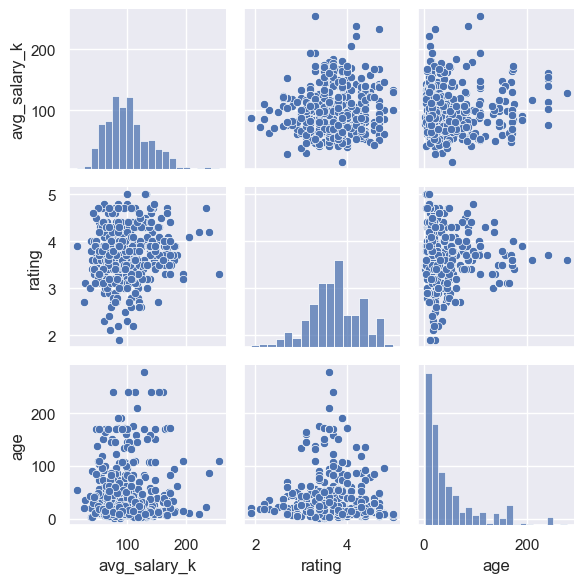

In [18]:
fig1 = plt.figure()
fig1 = sns.pairplot(df2, height=2)
plt.tight_layout()
fig1.figure.savefig(save_location+'scatterplot_matrix', dpi=300)

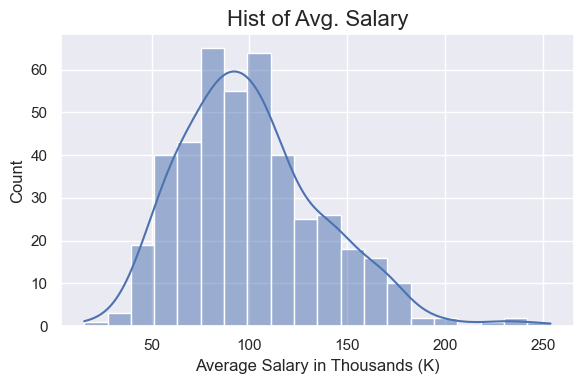

In [19]:
fig2 = plt.figure(figsize=(6, 4))
fig2 = sns.histplot(data=df2, x="avg_salary_k", kde=True)
fig2.set_xlabel('Average Salary in Thousands (K)', fontsize=12);
fig2.set_title('Hist of Avg. Salary', fontsize=16)
plt.tight_layout()
fig2.figure.savefig(save_location+'hist_avg_sal', dpi=300)

In [20]:
# adding two columns sqrt() and log transform of response for a new dataframe
df3 = pd.DataFrame()
df3['log_avg_salary_k'] = np.log(df2['avg_salary_k'])
df3['sqrt_avg_salary_k'] = np.sqrt(df2['avg_salary_k'])

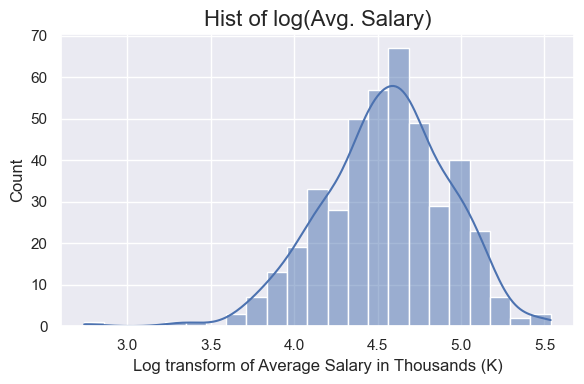

In [21]:
fig3 = plt.figure(figsize=(6, 4))
fig3 = sns.histplot(data=df3, x="log_avg_salary_k", kde=True)
fig3.set_xlabel('Log transform of Average Salary in Thousands (K)', fontsize=12);
fig3.set_title('Hist of log(Avg. Salary)', fontsize=16)
plt.tight_layout()
fig3.figure.savefig(save_location+'hist_log_avg_sal', dpi=300)

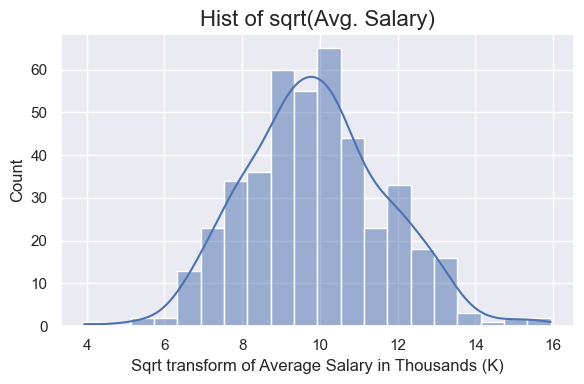

In [22]:
fig4 = plt.figure(figsize=(6, 4))
fig4 = sns.histplot(data=df3, x="sqrt_avg_salary_k", kde=True)
fig4.set_xlabel('Sqrt transform of Average Salary in Thousands (K)', fontsize=12);
fig4.set_title('Hist of sqrt(Avg. Salary)', fontsize=16)
plt.tight_layout()
fig4.figure.savefig(save_location+'hist_sqrt_avg_sal', dpi=300)

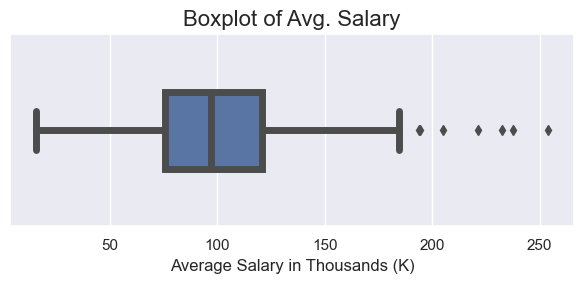

In [23]:
fig5 = plt.figure(figsize=(6, 3))
fig5 = sns.boxplot(x="avg_salary_k",data = df, linewidth=5, width=0.4)
#modify individual font size of elements
fig5.set_xlabel('Average Salary in Thousands (K)', fontsize=12);
fig5.set_title('Boxplot of Avg. Salary', fontsize=16)
plt.tight_layout()
fig5.figure.savefig(save_location+'bp_avg_salary', dpi=300)

## Read data and subset dataframe by qualitative variables

In [24]:
# subset qualitative variables from data
df4 = df[['size', 'python', 'visual_software','ML_software', 'spark', 'aws', 'excel', 'sql', 'sas', 'hadoop', 'degree','in_CA', 'senior_status']]
df4

,size,python,visual_software,ML_software,spark,aws,excel,sql,sas,hadoop,degree,in_CA,senior_status
0,501 - 1000,1,1,0,0,0,1,0,1,0,MS,False,False
1,10000+,1,0,0,0,0,0,0,0,0,MS,False,False
2,501 - 1000,1,0,0,1,0,1,1,1,0,MS,False,False
3,1001 - 5000,1,0,0,0,0,0,0,0,0,Other,False,False
4,51 - 200,1,0,0,0,0,1,1,1,0,Other,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,51 - 200,0,0,0,0,0,1,0,0,0,MS,False,True
429,1001 - 5000,0,0,0,0,1,1,1,0,0,MS,False,False
430,501 - 1000,0,0,0,0,1,1,0,0,0,MS,True,True
431,1 - 50,1,0,1,0,1,1,0,0,0,Other,True,False


In [25]:
# convert all dummy variables (0 and 1) to boolean true or false for easy viewing
df4 = df4.astype({'python': bool, 'visual_software': bool,'ML_software': bool, 'spark': bool, 'aws': bool, 'excel': bool,'sql': bool, 'sas': bool, 'hadoop': bool})
df4

,size,python,visual_software,ML_software,spark,aws,excel,sql,sas,hadoop,degree,in_CA,senior_status
0,501 - 1000,True,True,False,False,False,True,False,True,False,MS,False,False
1,10000+,True,False,False,False,False,False,False,False,False,MS,False,False
2,501 - 1000,True,False,False,True,False,True,True,True,False,MS,False,False
3,1001 - 5000,True,False,False,False,False,False,False,False,False,Other,False,False
4,51 - 200,True,False,False,False,False,True,True,True,False,Other,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,51 - 200,False,False,False,False,False,True,False,False,False,MS,False,True
429,1001 - 5000,False,False,False,False,True,True,True,False,False,MS,False,False
430,501 - 1000,False,False,False,False,True,True,False,False,False,MS,True,True
431,1 - 50,True,False,True,False,True,True,False,False,False,Other,True,False


In [26]:
#convert everything to categorical and added response variable back for easy plotting
df4 = df4.astype('category')
df4['avg_salary_k'] = df['avg_salary_k']

### Boxplots

#### size

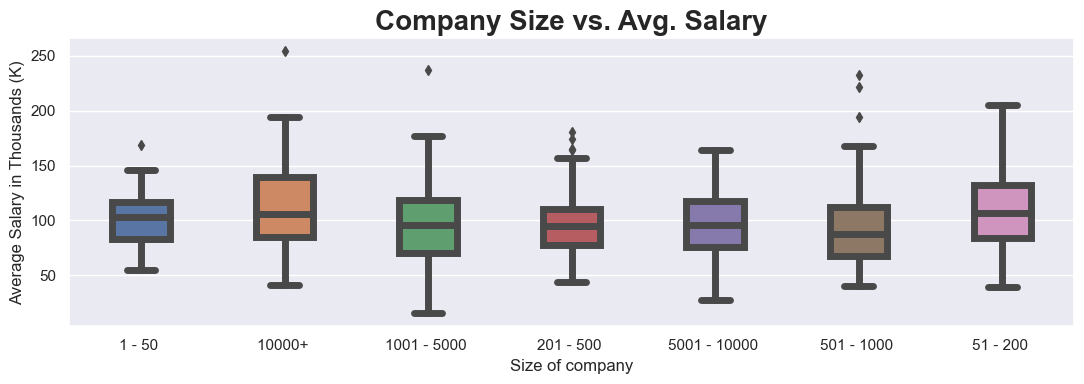

In [27]:
#size of company vs avg salary
fig6 = plt.figure(figsize=(11, 4))
fig6 = sns.boxplot(x="size", y="avg_salary_k",data = df4, linewidth=5, width=0.4)
#modify individual font size of elements
fig6.set_xlabel('Size of company', fontsize=12);
fig6.set_ylabel('Average Salary in Thousands (K)', fontsize=12);
fig6.set_title('Company Size vs. Avg. Salary', fontsize=20, fontweight='bold')
plt.tight_layout()
fig6.figure.savefig(save_location+'bp_size', dpi=300)

#### degree

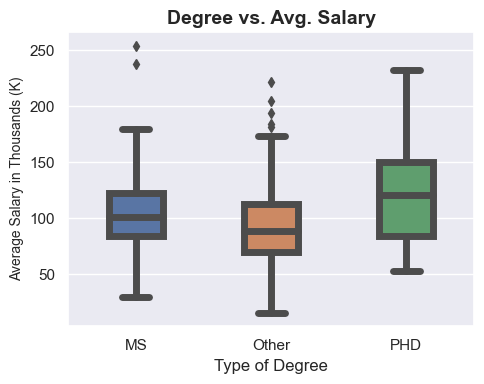

In [28]:
#degree vs avg salary
fig7 = plt.figure(figsize=(5, 4))
fig7 = sns.boxplot(x="degree", y="avg_salary_k",data = df4, linewidth=5, width=0.4)
#modify individual font size of elements
fig7.set_xlabel('Type of Degree', fontsize=12);
fig7.set_ylabel('Average Salary in Thousands (K)', fontsize=10);
fig7.set_title('Degree vs. Avg. Salary', fontsize=14, fontweight='bold')
plt.tight_layout()
fig7.figure.savefig(save_location+'bp_degree', dpi=300)

#### in_CA

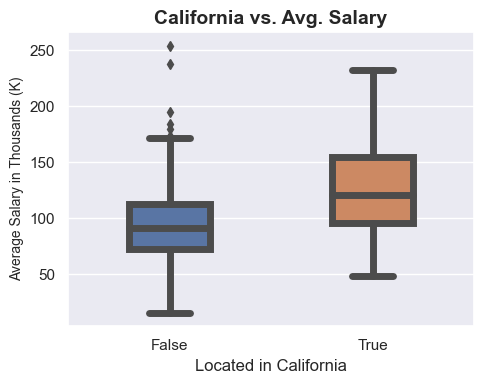

In [29]:
#in_ca vs avg salary
fig8 = plt.figure(figsize=(5, 4))
fig8 = sns.boxplot(x="in_CA", y="avg_salary_k",data = df4, linewidth=5, width=0.4)
#modify individual font size of elements
fig8.set_xlabel('Located in California', fontsize=12);
fig8.set_ylabel('Average Salary in Thousands (K)', fontsize=10);
fig8.set_title('California vs. Avg. Salary', fontsize=14, fontweight='bold')
plt.tight_layout()
fig8.figure.savefig(save_location+'bp_in_CA', dpi=300)

#### senior_status

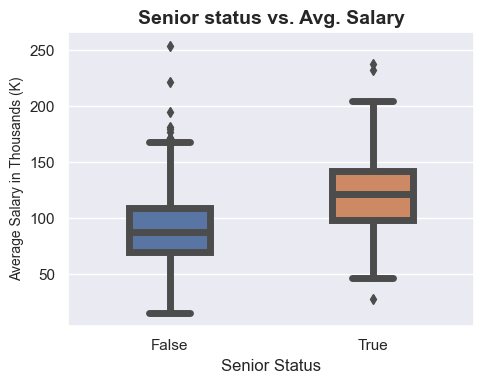

In [30]:
#senior_status vs avg salary
fig9 = plt.figure(figsize=(5, 4))
fig9 = sns.boxplot(x="senior_status", y="avg_salary_k",data = df4, linewidth=5, width=0.4)
#modify individual font size of elements
fig9.set_xlabel('Senior Status', fontsize=12);
fig9.set_ylabel('Average Salary in Thousands (K)', fontsize=10);
fig9.set_title('Senior status vs. Avg. Salary', fontsize=14, fontweight='bold')
plt.tight_layout()
fig9.figure.savefig(save_location+'bp_senior', dpi=300)

#### skills

In [31]:
df4

,size,python,visual_software,ML_software,spark,aws,excel,sql,sas,hadoop,degree,in_CA,senior_status,avg_salary_k
0,501 - 1000,True,True,False,False,False,True,False,True,False,MS,False,False,72.0
1,10000+,True,False,False,False,False,False,False,False,False,MS,False,False,87.5
2,501 - 1000,True,False,False,True,False,True,True,True,False,MS,False,False,85.0
3,1001 - 5000,True,False,False,False,False,False,False,False,False,Other,False,False,76.5
4,51 - 200,True,False,False,False,False,True,True,True,False,Other,False,False,114.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,51 - 200,False,False,False,False,False,True,False,False,False,MS,False,True,130.0
429,1001 - 5000,False,False,False,False,True,True,True,False,False,MS,False,False,86.5
430,501 - 1000,False,False,False,False,True,True,False,False,False,MS,True,True,92.0
431,1 - 50,True,False,True,False,True,True,False,False,False,Other,True,False,111.0


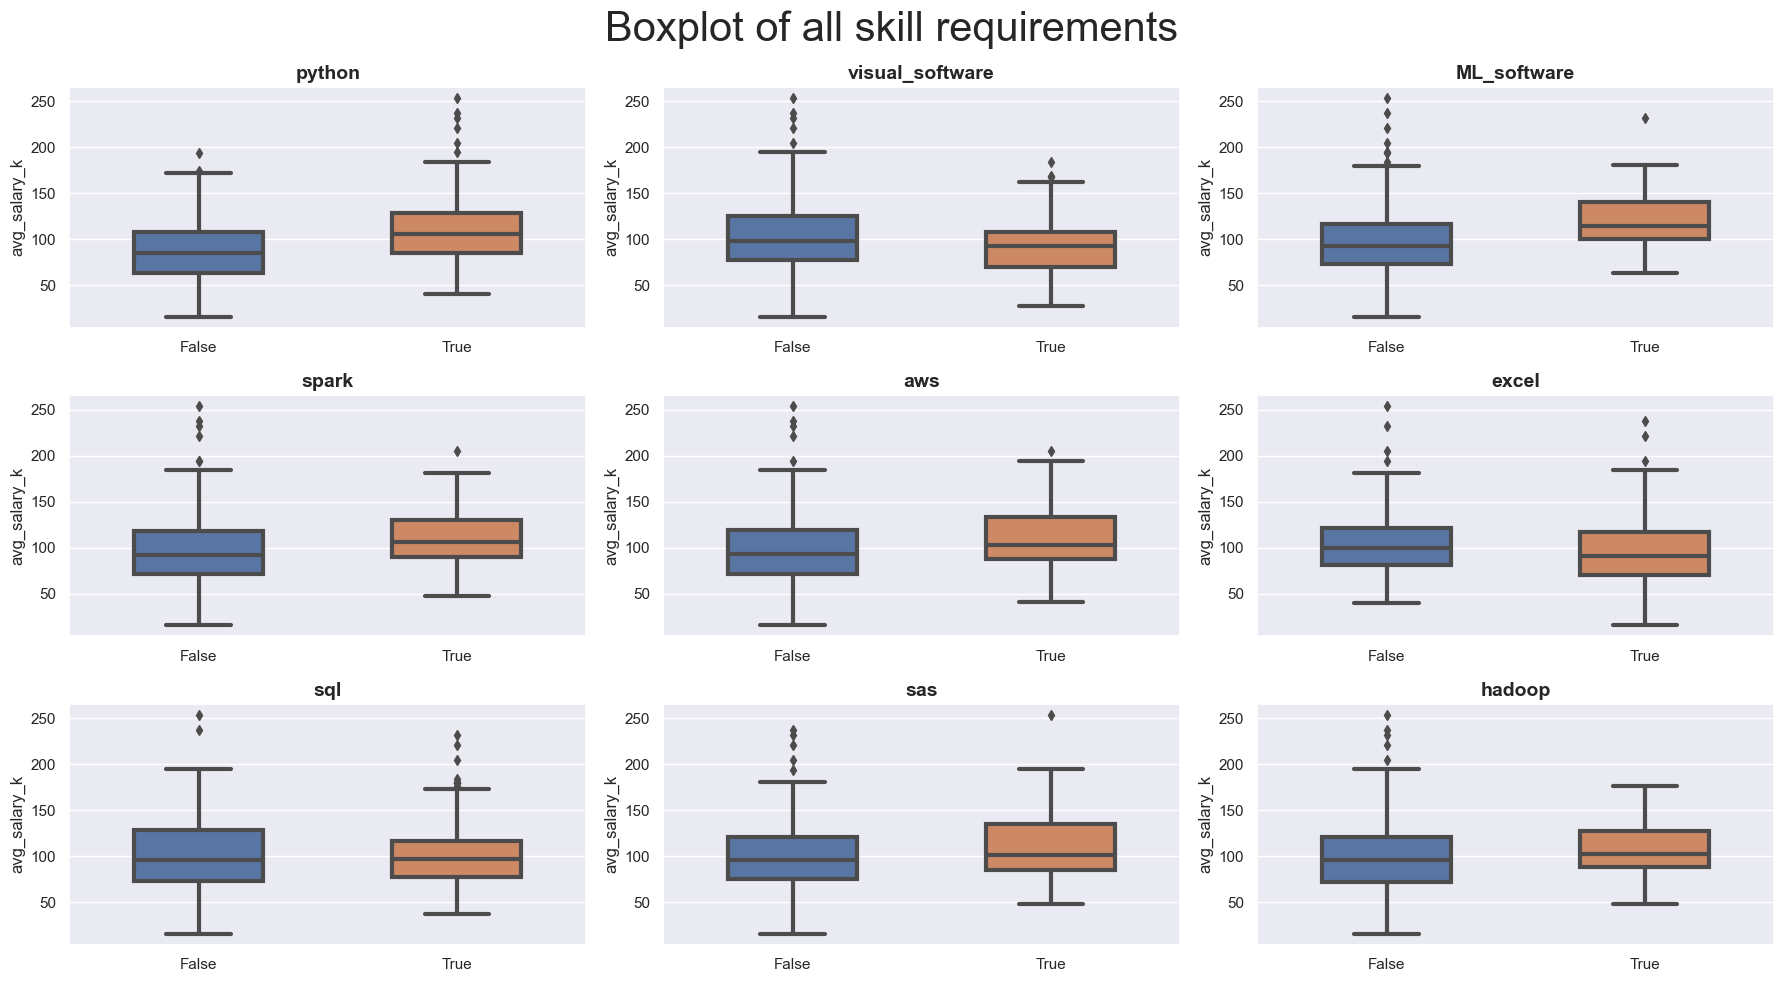

In [32]:
fig10, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(18, 10))
fig10.suptitle('Boxplot of all skill requirements',fontsize = 30)

sns.boxplot(ax=axes[0, 0],x="python", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None)
axes[0, 0].set_title('python', fontsize=14, fontweight='bold')

sns.boxplot(ax=axes[0, 1],x="visual_software", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None)
axes[0, 1].set_title('visual_software', fontsize=14, fontweight='bold')

sns.boxplot(ax=axes[0, 2],x="ML_software", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None)
axes[0, 2].set_title('ML_software', fontsize=14, fontweight='bold')

sns.boxplot(ax=axes[1, 0],x="spark", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None)
axes[1, 0].set_title('spark', fontsize=14, fontweight='bold')

sns.boxplot(ax=axes[1, 1],x="aws", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None)
axes[1, 1].set_title('aws', fontsize=14, fontweight='bold')

sns.boxplot(ax=axes[1, 2],x="excel", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None)
axes[1, 2].set_title('excel', fontsize=14, fontweight='bold')

sns.boxplot(ax=axes[2, 0],x="sql", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None)
axes[2, 0].set_title('sql', fontsize=14, fontweight='bold')

sns.boxplot(ax=axes[2, 1],x="sas", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None)
axes[2, 1].set_title('sas', fontsize=14, fontweight='bold')

sns.boxplot(ax=axes[2, 2],x="hadoop", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None)
axes[2, 2].set_title('hadoop', fontsize=14, fontweight='bold')


plt.tight_layout()
fig10.figure.savefig(save_location+'bp_skills', dpi=300)

In [33]:
### same as previous just different way of doing it but cant adjust title size
""" fig10, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(18, 10))
fig10.suptitle('Boxplot of all skill requirements',fontsize = 30)

sns.boxplot(ax=axes[0, 0],x="python", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None, title = "python")
sns.boxplot(ax=axes[0, 1],x="visual_software", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None, title = "visual_software")
sns.boxplot(ax=axes[0, 2],x="ML_software", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None, title = "ML_software")

sns.boxplot(ax=axes[1, 0],x="spark", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None, title = "spark")
sns.boxplot(ax=axes[1, 1],x="aws", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None, title = "aws")
sns.boxplot(ax=axes[1, 2],x="excel", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None, title = "excel")

sns.boxplot(ax=axes[2, 0],x="sql", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None, title = "sql")
sns.boxplot(ax=axes[2, 1],x="sas", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None, title = "sas")
sns.boxplot(ax=axes[2, 2],x="hadoop", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None, title = "hadoop") """

' fig10, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(18, 10))\nfig10.suptitle(\'Boxplot of all skill requirements\',fontsize = 30)\n\nsns.boxplot(ax=axes[0, 0],x="python", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None, title = "python")\nsns.boxplot(ax=axes[0, 1],x="visual_software", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None, title = "visual_software")\nsns.boxplot(ax=axes[0, 2],x="ML_software", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None, title = "ML_software")\n\nsns.boxplot(ax=axes[1, 0],x="spark", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None, title = "spark")\nsns.boxplot(ax=axes[1, 1],x="aws", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None, title = "aws")\nsns.boxplot(ax=axes[1, 2],x="excel", y="avg_salary_k",data = df4, linewidth=3, width=0.5).set(xlabel=None, title = "excel")\n\nsns.boxplot(ax=axes[2, 0],x="sql", y="avg_salary_k",data = df4, linewidth=3

### Pie Charts

#### size

In [34]:
#check order
df4['size'].value_counts()

1001 - 5000      93
10000+           76
501 - 1000       76
201 - 500        73
51 - 200         57
5001 - 10000     45
1 - 50           13
Name: size, dtype: int64

In [35]:
# get counts
df4['size'].value_counts()
size_count = list(df4['size'].value_counts())

# create list with the same order
size_list = ['1001 - 5000','10000+','501 - 1000','201 - 500','51 - 200', '5001 - 10000','1 - 50']

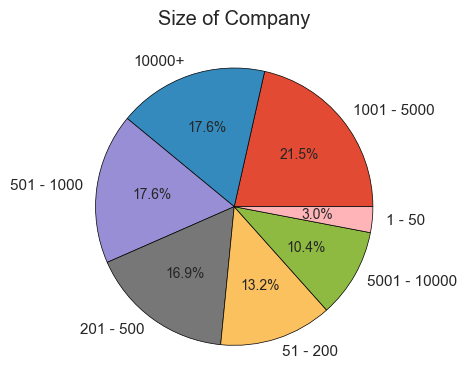

In [36]:
#pie of size
#Using matplotlib
plt.style.use('ggplot')

plt.figure(figsize=(5, 4))
plt.pie(size_count, labels=size_list, shadow=False,
        startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Size of Company")
plt.tight_layout()
plt.show()
#plt.savefig(save_location+'pie_size', dpi=300)

#### degree

In [37]:
#check order
df4['degree'].value_counts()

Other    227
MS       151
PHD       55
Name: degree, dtype: int64

In [38]:
degree_count = list(df4['degree'].value_counts())

# create list with the same order
degree_name = ['Other','MS','PHD']

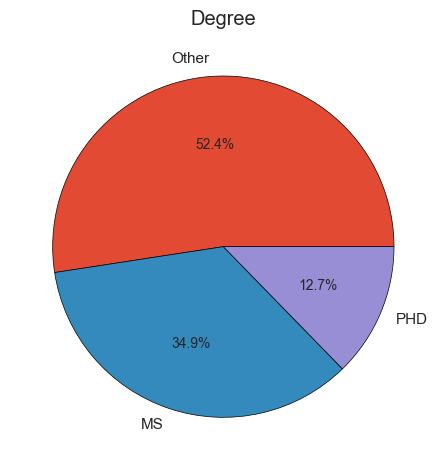

In [39]:
#pie of degree
#Using matplotlib
plt.style.use('ggplot')


plt.pie(degree_count, labels=degree_name, shadow=False,
        startangle=0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Degree")
plt.tight_layout()
plt.show()
#plt.savefig(save_location+'pie_degree',bbox_inches='tight', dpi=300)